# M小白实验室

第一期： 玩转Labo——Labo操控电脑

作者：M小白

- Pillow 用于截屏与图形处理
- skimage （基于matplotlib）绘图
- numpy 用于科学计算
- autopy/pywin32 用于模拟键盘鼠标

## 1. 截屏

截取指定区域的图像

这里box的四个参数根据各位想截取的位置而定

考虑到各位可能没有实验前提（前提：switch+labo+制作电路+手机录制并投屏）

笔者已经为各位提供了一组图片

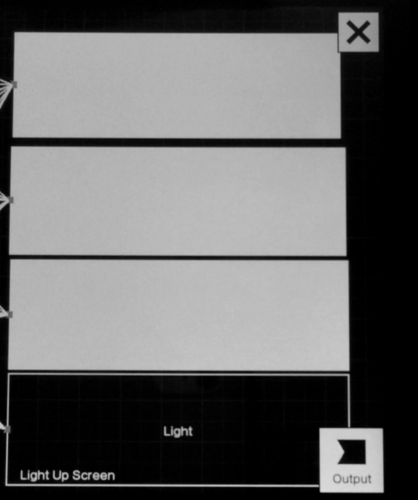

In [44]:
from PIL import ImageGrab
import numpy as np
# import warnings
# warnings.filterwarnings("ignore")

# 截取图片
# 第一个参数 开始截图的x坐标
# 第二个参数 开始截图的y坐标
# 第三个参数 结束截图的x坐标
# 第四个参数 结束截图的y坐标
box = (956, 100, 1374, 600) 
img = ImageGrab.grab(box) 

# 转为灰度图
img = img.convert('L')  

# 转化为array
imgArray = np.array(img)/255

# 显示特定区域的图片
# 各位会显示屏幕右侧区域的图像
img

In [21]:
# 查看图片的数值 数值越大越亮
imgArray

array([[0.03921569, 0.03921569, 0.03921569, ..., 0.        , 0.        ,
        0.        ],
       [0.03529412, 0.04313725, 0.03921569, ..., 0.        , 0.        ,
        0.        ],
       [0.03921569, 0.04705882, 0.04313725, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01568627, 0.01960784, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.00784314, 0.01176471, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
        0.        ]])

载入图片实验

读取存放在example中的14个png图片，其值分别对应0-13

In [32]:
from skimage import io

pngList = []
for i in range(14):
    pngName = 'example\\' + str(i) + '.png'
    pngList.append(io.imread(pngName,as_grey=True)/255)

[[0.04705882 0.04705882 0.04705882 ... 0.         0.         0.        ]
 [0.04313725 0.04313725 0.04313725 ... 0.         0.         0.        ]
 [0.05098039 0.04705882 0.05490196 ... 0.         0.         0.        ]
 ...
 [0.00784314 0.00784314 0.01176471 ... 0.         0.         0.        ]
 [0.00392157 0.00392157 0.00392157 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


C:\Users\mr_mo\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


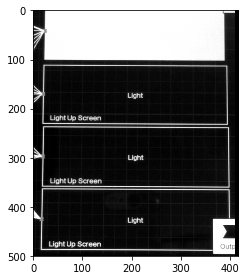

In [38]:
# 查看代表值为1的图片以及其数据
print(pngList[1])
io.imshow(pngList[1])

## 2. 获取图片中指定N个区域的明亮程度与编码

In [39]:
# 我们导入代表值为3的图片
imgArray = pngList[3]

In [45]:
imgY,imgX = imgArray.shape
totalAera = 4   # 划分几个区域识别 这里设置4个  图像横向切开 4个区域纵向排列
aera = [0]*totalAera  # 初始化区域列表

In [46]:
# 确定各个区域的明暗程度

stepY = int(imgY/totalAera)
uncodeKey = []  # 非编码
codekey = 0     # 编码
for i in range(totalAera):
    aera[i] = imgArray[stepY*i:stepY*(i+1)].mean()
    if aera[i]>0.5:
        codekey += 2**i
        print("第%s个区域是白色，亮度为%s" % (i+1,aera[i]))
        uncodeKey.append(str(i+1))
    else:
        print("第%s个区域是黑色，亮度为%s" % (i+1,aera[i]))
        
print("\n编码情况下 按下的键的编号为%s" % codekey)
print("\n非编码下 按下的键的编号为%s" % (" ".join(uncodeKey)))

第1个区域是黑色，亮度为0.4254529693216999
第2个区域是白色，亮度为0.5326282765737873
第3个区域是白色，亮度为0.5621569753260156
第4个区域是黑色，亮度为0.08443944084810957

编码情况下 按下的键的编号为6

非编码下 按下的键的编号为2 3


## 3. 将获取的内容输入到html文件中（用于展示中间结果）

In [42]:
import re
with open('./index.html','r',encoding='UTF-8') as f:
    string = f.read()
    
print("修改前：")
print(string)
print("\n修改后：")
stringNew = re.sub(';">(.*)</p>',';">%s</p>' % codekey,string)
print(stringNew)

with open('./index.html','w',encoding='UTF-8') as f:
    f.write(stringNew)

修改前：
<!DOCTYPE html>
<html lang="zh-CN">
<head>
    <meta charset="utf-8" />
    <meta http-equiv="refresh" content="0.1">
    <meta name="author" content="M小白">
    <title>【M小白实验室】 花式玩转Labo</title>
</head>
<body>
    <h1 style="font-size: 128px;text-align: center;">按下键的值为</h1>
    <p style="font-size: 128px;text-align: center;">0</p>
</body>
</html>

修改后：
<!DOCTYPE html>
<html lang="zh-CN">
<head>
    <meta charset="utf-8" />
    <meta http-equiv="refresh" content="0.1">
    <meta name="author" content="M小白">
    <title>【M小白实验室】 花式玩转Labo</title>
</head>
<body>
    <h1 style="font-size: 128px;text-align: center;">按下键的值为</h1>
    <p style="font-size: 128px;text-align: center;">3</p>
</body>
</html>


In [7]:
# 旧方法 已经无用
# from bs4 import BeautifulSoup
# soup = BeautifulSoup(open("./index.html",'r',encoding='UTF-8'), 'html.parser')
# soup.select("p")

## 4.键盘鼠标模拟操作

- [Autopy官方文档](https://www.autopy.org/documentation/api-reference/)
autopy有点坑，笔者目前不知道其键盘模拟如何实现

- [安装pywin32方法](https://jingyan.baidu.com/article/bad08e1ed173d409c85121f8.html)
直接用pip安装pywin32的时候各位可能会出现报错

- [使用pywin32实现按键模拟](https://blog.csdn.net/smallsmallmouse/article/details/78689675)
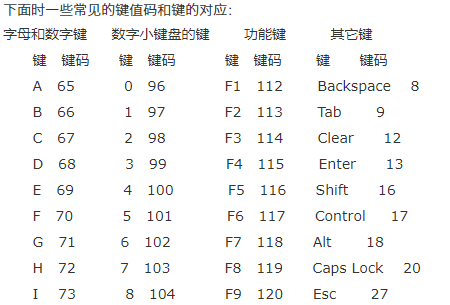

In [9]:
import autopy
import win32api
import win32con

In [14]:
# 会用到的api列表
autopy.mouse.move(100, 100) # 移动鼠标
autopy.mouse.smooth_move(300, 300) # 平滑移动鼠标（上面那个是瞬间的）
 
autopy.mouse.click() # 单击
win32api.keybd_event(87,0,0,0)  #W键位码是87
win32api.keybd_event(83,0,0,0)  #S键位码是83
win32api.keybd_event(65,0,0,0)  #A键位码是65
win32api.keybd_event(68,0,0,0)  #D键位码是68

win32api.keybd_event(37,0,0,0)  #Left Arrow
win32api.keybd_event(38,0,0,0)  #Up Arrow
win32api.keybd_event(39,0,0,0)  #Right Arrow
win32api.keybd_event(40,0,0,0)  #Down Arrow